In [2]:
# Data manipulation 
import os
import pandas as pd
import glob
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#pd.set_option('display.max_columns', None)
#pd.set_option("display.max_rows", None)

#MAchine learning
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

# Data loading

In [3]:
df2 = pd.read_csv("C:/Users/Ena/Desktop/THESIS/eyetzip_data_with_score.csv", low_memory=False)
df2

,Unnamed: 0,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,Recording start time,...,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Mouse position X,Mouse position Y,Total Score extended
0,3082,512092386,NaN,Test group experiment,2020-10-29,Participant0001,Recording1,2020-10-29,2020-09-24,1900-01-01 15:17:34.920,...,Fixation,117.0,64.0,971.0,341.0,0.5073,0.316,NaN,NaN,137
1,3083,512092386,NaN,Test group experiment,2020-10-29,Participant0001,Recording1,2020-10-29,2020-09-24,1900-01-01 15:17:34.920,...,Fixation,117.0,64.0,971.0,341.0,0.5073,0.316,NaN,NaN,137
2,3084,512099191,Eye Tracker,Test group experiment,2020-10-29,Participant0001,Recording1,2020-10-29,2020-09-24,1900-01-01 15:17:34.920,...,Fixation,117.0,64.0,971.0,341.0,0.5073,0.316,NaN,NaN,137
3,3085,512107520,Eye Tracker,Test group experiment,2020-10-29,Participant0001,Recording1,2020-10-29,2020-09-24,1900-01-01 15:17:34.920,...,Fixation,117.0,64.0,971.0,341.0,0.5073,0.316,NaN,NaN,137
4,3086,512115853,Eye Tracker,Test group experiment,2020-10-29,Participant0001,Recording1,2020-10-29,2020-09-24,1900-01-01 15:17:34.920,...,Fixation,117.0,64.0,971.0,341.0,0.5073,0.316,NaN,NaN,137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4844299,31731,1666203561855,NaN,Participant0060,2021-09-20,Participant0060,Recording4,2021-09-20,2021-09-20,1900-01-01 16:36:55.737,...,Fixation,167.0,161.0,738.0,501.0,NaN,NaN,NaN,NaN,80
4844300,31732,1666203567052,Eye Tracker,Participant0060,2021-09-20,Participant0060,Recording4,2021-09-20,2021-09-20,1900-01-01 16:36:55.737,...,Fixation,167.0,161.0,738.0,501.0,NaN,NaN,NaN,NaN,80
4844301,31733,1666203575378,Eye Tracker,Participant0060,2021-09-20,Participant0060,Recording4,2021-09-20,2021-09-20,1900-01-01 16:36:55.737,...,Fixation,167.0,161.0,738.0,501.0,NaN,NaN,NaN,NaN,80
4844302,31734,1666203583675,Eye Tracker,Participant0060,2021-09-20,Participant0060,Recording4,2021-09-20,2021-09-20,1900-01-01 16:36:55.737,...,Fixation,167.0,161.0,738.0,501.0,NaN,NaN,NaN,NaN,80


In [5]:
df2.columns

Index(['Unnamed: 0', 'Computer timestamp', 'Sensor', 'Project name',
       'Export date', 'Participant name', 'Recording name', 'Recording date',
       'Recording date UTC', 'Recording start time',
       'Recording start time UTC', 'Recording duration', 'Timeline name',
       'Recording Fixation filter name', 'Recording software version',
       'Recording resolution height', 'Recording resolution width',
       'Recording monitor latency', 'Eyetracker timestamp', 'Event',
       'Event value', 'Gaze point X', 'Gaze point Y', 'Gaze point left X',
       'Gaze point left Y', 'Gaze point right X', 'Gaze point right Y',
       'Gaze direction left X', 'Gaze direction left Y',
       'Gaze direction left Z', 'Gaze direction right X',
       'Gaze direction right Y', 'Gaze direction right Z',
       'Pupil diameter left', 'Pupil diameter right', 'Validity left',
       'Validity right', 'Eye position left X (DACSmm)',
       'Eye position left Y (DACSmm)', 'Eye position left Z (DACSmm)'

In [6]:
# Separate data based on project name
control_group_data = df2[df2['Project name'] == 'Control group experiment']
test_group_data = df2[df2['Project name'] == 'Test group experiment']

In [7]:
# This function was adapted from PRIYANK RAVAL's Kaggle notebook: https://www.kaggle.com/code/priyankraval/eyet-empathyscore-ipynb#Step-3-:-#Load-eyetzip_data_with_score.csv-with-empathy-score-for-data-analysis
# Select relevant columns for control group
control_selected_columns = ['Participant name', 'Recording duration',
                             'Pupil diameter left', 'Pupil diameter right',
                             'Eye position left X (DACSmm)', 'Eye position left Y (DACSmm)', 'Eye position left Z (DACSmm)',
                             'Eye position right X (DACSmm)', 'Eye position right Y (DACSmm)', 'Eye position right Z (DACSmm)',
                             'Gaze event duration', 'Fixation point X', 'Fixation point Y', 'Total Score extended', 'Gaze point X', 'Gaze point Y', 'Gaze event duration']

# Create a DataFrame with selected columns for control group
control_group_selected = control_group_data[control_selected_columns]

# Select relevant columns for test group
test_selected_columns = ['Participant name', 'Recording duration',
                         'Pupil diameter left', 'Pupil diameter right',
                         'Eye position left X (DACSmm)', 'Eye position left Y (DACSmm)', 'Eye position left Z (DACSmm)',
                         'Eye position right X (DACSmm)', 'Eye position right Y (DACSmm)', 'Eye position right Z (DACSmm)',
                         'Gaze event duration', 'Fixation point X', 'Fixation point Y', 'Total Score extended', 'Gaze point X', 'Gaze point Y', 'Gaze event duration']

# Create a DataFrame with selected columns for test group
test_group_selected = test_group_data[test_selected_columns]

In [8]:
not_in_list = sorted(set(df2.columns) - set(control_selected_columns))

print("Columns not in the given list:", list(not_in_list))

Columns not in the given list: ['Computer timestamp', 'Event', 'Event value', 'Export date', 'Eye movement type', 'Eye movement type index', 'Eyetracker timestamp', 'Fixation point X (MCSnorm)', 'Fixation point Y (MCSnorm)', 'Gaze direction left X', 'Gaze direction left Y', 'Gaze direction left Z', 'Gaze direction right X', 'Gaze direction right Y', 'Gaze direction right Z', 'Gaze point X (MCSnorm)', 'Gaze point Y (MCSnorm)', 'Gaze point left X', 'Gaze point left X (DACSmm)', 'Gaze point left X (MCSnorm)', 'Gaze point left Y', 'Gaze point left Y (DACSmm)', 'Gaze point left Y (MCSnorm)', 'Gaze point right X', 'Gaze point right X (DACSmm)', 'Gaze point right X (MCSnorm)', 'Gaze point right Y', 'Gaze point right Y (DACSmm)', 'Gaze point right Y (MCSnorm)', 'Mouse position X', 'Mouse position Y', 'Original Media height', 'Original Media width', 'Presented Media height', 'Presented Media name', 'Presented Media position X (DACSpx)', 'Presented Media position Y (DACSpx)', 'Presented Media wi

In [9]:
print(sorted(control_group_selected.columns))
print(sorted(test_group_selected.columns))

['Eye position left X (DACSmm)', 'Eye position left Y (DACSmm)', 'Eye position left Z (DACSmm)', 'Eye position right X (DACSmm)', 'Eye position right Y (DACSmm)', 'Eye position right Z (DACSmm)', 'Fixation point X', 'Fixation point Y', 'Gaze event duration', 'Gaze event duration', 'Gaze point X', 'Gaze point Y', 'Participant name', 'Pupil diameter left', 'Pupil diameter right', 'Recording duration', 'Total Score extended']
['Eye position left X (DACSmm)', 'Eye position left Y (DACSmm)', 'Eye position left Z (DACSmm)', 'Eye position right X (DACSmm)', 'Eye position right Y (DACSmm)', 'Eye position right Z (DACSmm)', 'Fixation point X', 'Fixation point Y', 'Gaze event duration', 'Gaze event duration', 'Gaze point X', 'Gaze point Y', 'Participant name', 'Pupil diameter left', 'Pupil diameter right', 'Recording duration', 'Total Score extended']


In [10]:
# Replace NaN values with 0 in control group dataframe
control_group_selected = control_group_selected.fillna(0)

# Replace NaN values with 0 in test group dataframe
test_group_selected = test_group_selected.fillna(0)

In [11]:
# This function was adapted from PRIYANK RAVAL's Kaggle notebook: https://www.kaggle.com/code/priyankraval/eyet-empathyscore-ipynb#Step-3-:-#Load-eyetzip_data_with_score.csv-with-empathy-score-for-data-analysis
control_group_selected = control_group_selected.copy()
test_group_selected = test_group_selected.copy()

# Calculate Eye_Position_Ratio_X
control_group_selected['Eye_Position_Ratio_X'] = control_group_selected['Eye position left X (DACSmm)'] / (control_group_selected['Eye position right X (DACSmm)'] + 1e-6)
test_group_selected['Eye_Position_Ratio_X'] = test_group_selected['Eye position left X (DACSmm)'] / (test_group_selected['Eye position right X (DACSmm)'] + 1e-6)

# Calculate Eye_Position_Ratio_Y
control_group_selected['Eye_Position_Ratio_Y'] = control_group_selected['Eye position left Y (DACSmm)'] / (control_group_selected['Eye position right Y (DACSmm)'] + 1e-6)
test_group_selected['Eye_Position_Ratio_Y'] = test_group_selected['Eye position left Y (DACSmm)'] / (test_group_selected['Eye position right Y (DACSmm)'] + 1e-6)

# Calculate Eye_Position_Ratio_Z
control_group_selected['Eye_Position_Ratio_Z'] = control_group_selected['Eye position left Z (DACSmm)'] / (control_group_selected['Eye position right Z (DACSmm)'] + 1e-6)
test_group_selected['Eye_Position_Ratio_Z'] = test_group_selected['Eye position left Z (DACSmm)'] / (test_group_selected['Eye position right Z (DACSmm)'] + 1e-6)


In [12]:
# This function was adapted from PRIYANK RAVAL's Kaggle notebook: https://www.kaggle.com/code/priyankraval/eyet-empathyscore-ipynb#Step-3-:-#Load-eyetzip_data_with_score.csv-with-empathy-score-for-data-analysis
columns_to_drop = ['Eye position left X (DACSmm)', 'Eye position left Y (DACSmm)',
       'Eye position left Z (DACSmm)', 'Eye position right X (DACSmm)',
       'Eye position right Y (DACSmm)', 'Eye position right Z (DACSmm)'
                   ]

control_group_selected.drop(columns=columns_to_drop, inplace=True)
test_group_selected.drop(columns=columns_to_drop, inplace=True)

In [13]:
# This function was adapted from PRIYANK RAVAL's Kaggle notebook: https://www.kaggle.com/code/priyankraval/eyet-empathyscore-ipynb#Step-3-:-#Load-eyetzip_data_with_score.csv-with-empathy-score-for-data-analysis
# Define the input features (X) and target variable (y) for control group
X_control_group = control_group_selected.drop(columns=['Total Score extended', 'Participant name', 'Recording duration'])
y_control_group = control_group_selected['Total Score extended']


# Define the input features (X) and target variable (y) for test group
X_t_group= test_group_selected.drop(columns=['Total Score extended', 'Participant name', 'Recording duration'])
y_t_group = test_group_selected['Total Score extended']

In [14]:
print(X_t_group.columns)
print(X_control_group.columns)

Index(['Pupil diameter left', 'Pupil diameter right', 'Gaze event duration',
       'Fixation point X', 'Fixation point Y', 'Gaze point X', 'Gaze point Y',
       'Gaze event duration', 'Eye_Position_Ratio_X', 'Eye_Position_Ratio_Y',
       'Eye_Position_Ratio_Z'],
      dtype='object')
Index(['Pupil diameter left', 'Pupil diameter right', 'Gaze event duration',
       'Fixation point X', 'Fixation point Y', 'Gaze point X', 'Gaze point Y',
       'Gaze event duration', 'Eye_Position_Ratio_X', 'Eye_Position_Ratio_Y',
       'Eye_Position_Ratio_Z'],
      dtype='object')


In [15]:
train_ratio = 0.80
validation_ratio = 0.10
test_ratio = 0.10


X_control_train, X_control_test, y_control_train, y_control_test = train_test_split(X_control_group, y_control_group, test_size=1 - train_ratio)

x_control_val, x_control_test, y_control_val, y_control_test = train_test_split(X_control_test, y_control_test, test_size=test_ratio/(test_ratio + validation_ratio))

print(X_control_train.shape, x_control_val.shape, x_control_test.shape)
print(y_control_train.shape, y_control_val.shape, y_control_test.shape)



train_ratio = 0.80
validation_ratio = 0.10
test_ratio = 0.10

X_t_train, X_t_test, y_t_train, y_t_test = train_test_split(X_t_group, y_t_group, test_size=1 - train_ratio)


x_t_val, x_t_test, y_t_val, y_t_test = train_test_split(X_t_test, y_t_test, test_size=test_ratio/(test_ratio + validation_ratio))

print(X_t_train.shape, x_t_val.shape, x_t_test.shape)
print(y_t_train.shape, y_t_val.shape, y_t_test.shape)



(253548, 11) (31693, 11) (31694, 11)
(253548,) (31693,) (31694,)
(1302930, 11) (162866, 11) (162867, 11)
(1302930,) (162866,) (162867,)


## Linear Regression

### Control

In [40]:
# Create a linear regression model
linear_model_control = LinearRegression()

# Train the model on the training set
linear_model_control.fit(X_control_train, y_control_train)

# Make predictions on the testing set
y_control_pred = linear_model_control.predict(x_control_test)

# Evaluate the model
mse = mean_squared_error(y_control_test, y_control_pred)
r2 = r2_score(y_control_test, y_control_pred)  
mae = mean_absolute_error(y_control_test, y_control_pred)
print("control group")
print("Mean Squared Error: {:.3f}".format(mse))
print("R-squared: {:.3f}".format(r2))
print("Mean Absolute Error: {:.3f}".format(mae))

control group
Mean Squared Error: 57.606
R-squared: 0.112
Mean Absolute Error: 5.300


In [42]:
feature_importance = abs(linear_model_control.coef_)
feature_names = X_control_train.columns.tolist() 
# Iterate over both lists simultaneously
for name, importance in zip(feature_names, feature_importance):
    # Format the output to display feature name and coefficient magnitude rounded to 3 decimals
    print(f'{name}: {importance:.3f}')


Pupil diameter left: 0.137
Pupil diameter right: 0.182
Gaze event duration: 0.002
Fixation point X: 0.001
Fixation point Y: 0.003
Gaze point X: 0.002
Gaze point Y: 0.002
Gaze event duration: 0.002
Eye_Position_Ratio_X: 0.000
Eye_Position_Ratio_Y: 0.000
Eye_Position_Ratio_Z: 0.000


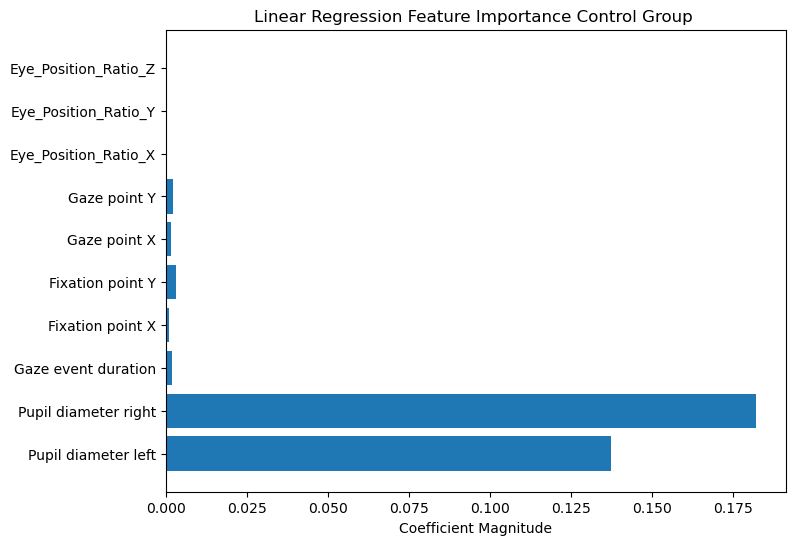

In [44]:
plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Coefficient Magnitude')
plt.title('Linear Regression Feature Importance Control Group ')
plt.savefig("lr_FI_control.jpg", bbox_inches='tight' )
plt.show()

### Test 

In [46]:
# Create a linear regression model
linear_model_test = LinearRegression()

# Train the model on the training set
linear_model_test.fit(X_t_train, y_t_train)

# Make predictions on the testing set
y_pred = linear_model_test.predict(x_t_test)

# Evaluate the model
mse = mean_squared_error(y_t_test, y_pred)
r2 = r2_score(y_t_test, y_pred)  
mae = mean_absolute_error(y_t_test, y_pred)
print("test group")
print("Mean Squared Error: {:.3f}".format(mse))
print("R-squared: {:.3f}".format(r2))
print("Mean Absolute Error: {:.3f}".format(mae))


test group
Mean Squared Error: 235.959
R-squared: 0.094
Mean Absolute Error: 12.184


In [51]:
feature_importance = abs(linear_model_test.coef_)
feature_names = X_t_train.columns.tolist() 
# Iterate over both lists simultaneously
for name, importance in zip(feature_names, feature_importance):
    # Format the output to display feature name and coefficient magnitude rounded to 3 decimals
    print(f'{name}: {importance:.3f}')


Pupil diameter left: 1.156
Pupil diameter right: 0.583
Gaze event duration: 0.003
Fixation point X: 0.002
Fixation point Y: 0.010
Gaze point X: 0.001
Gaze point Y: 0.004
Gaze event duration: 0.003
Eye_Position_Ratio_X: 0.000
Eye_Position_Ratio_Y: 0.000
Eye_Position_Ratio_Z: 0.000


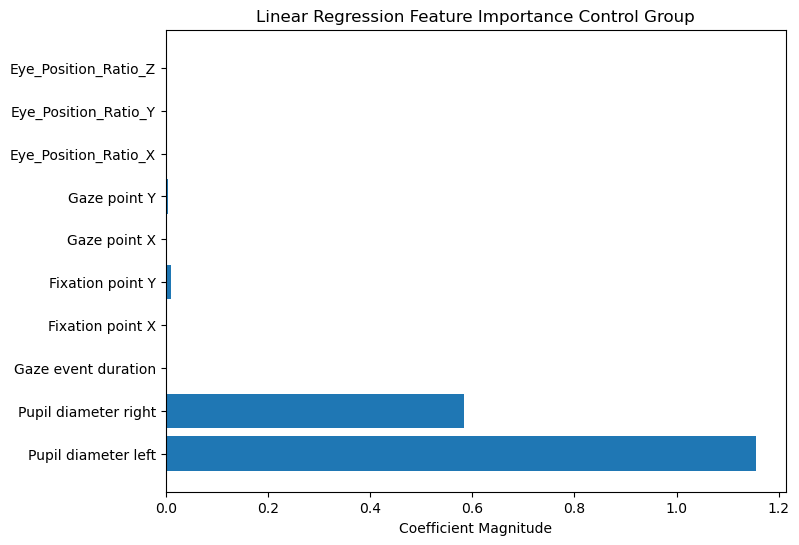

In [53]:
plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Coefficient Magnitude')
plt.title('Linear Regression Feature Importance Control Group')
plt.savefig("lr_FI_test.jpg", bbox_inches='tight' )
plt.show()

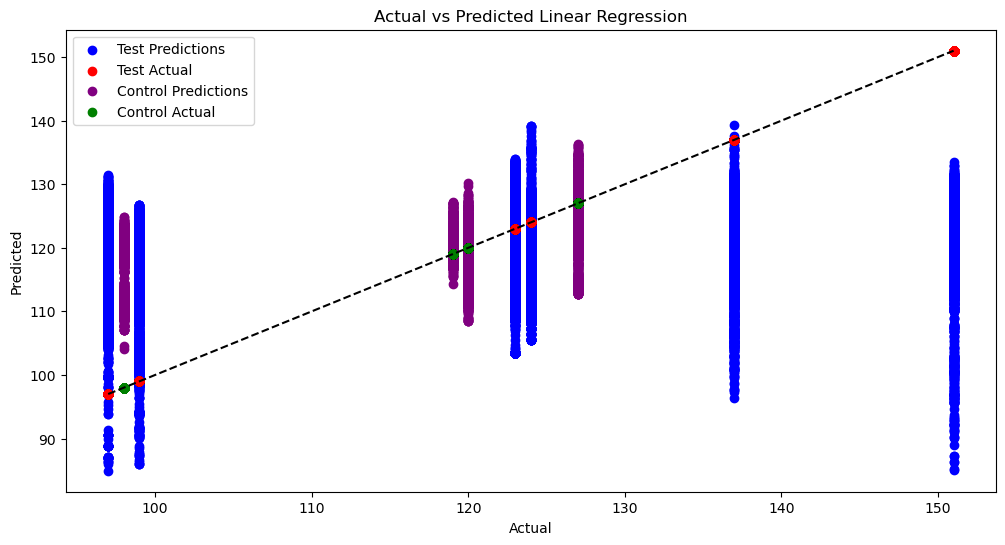

In [59]:
# This function was adapted from PRIYANK RAVAL's Kaggle notebook: https://www.kaggle.com/code/priyankraval/eyet-empathyscore-ipynb#Step-3-:-#Load-eyetzip_data_with_score.csv-with-empathy-score-for-data-analysis
plt.figure(figsize=(12, 6))

# Plot actual vs predicted for the treatment group
plt.scatter(y_t_test, y_pred, color='blue', label='Test Predictions')
plt.scatter(y_t_test, y_t_test, color="red", label='Test Actual')

# Plot actual vs predicted for the control group
plt.scatter(y_control_test, y_control_pred, color='purple', label='Control Predictions')
plt.scatter(y_control_test, y_control_test, color="green", label='Control Actual')

plt.plot([min(y_t_test.min(), y_control_test.min()), max(y_t_test.max(), y_control_test.max())], 
         [min(y_t_test.min(), y_control_test.min()), max(y_t_test.max(), y_control_test.max())], 
         color='black', linestyle='--')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Linear Regression')
plt.legend()
plt.savefig("score_best_lr.jpg", bbox_inches='tight')
plt.show()


# Decision Tree regressor

### base model & tunning


In [ ]:
dt_model_control = DecisionTreeRegressor(max_depth=3, random_state=42).fit(X_control_train, y_control_train) # You can adjust max_depth

# Make predictions on the testing set
y_control_pred = dt_model_control.predict(x_control_test)

# Evaluate the model
mse = mean_squared_error(y_control_test, y_control_pred)
r2 = r2_score(y_control_test, y_control_pred)  
mae = mean_absolute_error(y_control_test, y_control_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)


dt_model_test = DecisionTreeRegressor(max_depth=3, random_state=42) # You can adjust max_depth
dt_model_test.fit(X_t_train, y_t_train)

# Make predictions on the testing set
y_pred = dt_model_test.predict(x_t_test)

# Evaluate the model
mse = mean_squared_error(y_t_test, y_pred)
r2 = r2_score(y_t_test, y_pred)  
mae = mean_absolute_error(y_t_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

### Tuning control

In [16]:
# Define Objective Function
def objective(params):
    dt = DecisionTreeRegressor(**params, random_state=42)
    dt.fit(X_control_train, y_control_train)  # Train the model on the validation set
    y_pred = dt.predict(x_control_val)
    mse = mean_squared_error(y_control_val, y_pred)
    return {'loss': mse, 'status': STATUS_OK}

# Define Search Space
space = {
    'max_depth': hp.choice('max_depth', range(1, 11)),  # Vary max_depth from 1 to 10
    'min_samples_split': hp.choice('min_samples_split', range(2, 11)),  # Vary min_samples_split from 2 to 10
    'min_samples_leaf': hp.choice('min_samples_leaf', range(1, 11)),  # Vary min_samples_leaf from 1 to 10
    'max_features': hp.choice('max_features', ['sqrt', 'log2', None])  # Vary max_features
}

# Run Hyperparameter Optimization
trials = Trials()
best = fmin(objective, space, algo=tpe.suggest, max_evals=20, trials=trials)

# Print the best hyperparameters
print("Best hyperparameters control group :", best)
#Best hyperparameters control group : {'max_depth': 8, 'max_features': 2, 'min_samples_leaf': 9, 'min_samples_split': 7}

100%|██████████| 20/20 [00:10<00:00,  1.83trial/s, best loss: 16.50571677052331]
Best hyperparameters control group : {'max_depth': 8, 'max_features': 2, 'min_samples_leaf': 9, 'min_samples_split': 7}


### Tuning Test

In [17]:
def objective(params):
    dt = DecisionTreeRegressor(**params, random_state=42)
    dt.fit(X_t_train, y_t_train)  # Train the model on the validation set
    y_pred = dt.predict(x_t_val)
    mse = mean_squared_error(y_t_val, y_pred)
    return {'loss': mse, 'status': STATUS_OK}

# Define Search Space
space = {
    'max_depth': hp.choice('max_depth', range(1, 11)),  # Vary max_depth from 1 to 10
    'min_samples_split': hp.choice('min_samples_split', range(2, 11)),  # Vary min_samples_split from 2 to 10
    'min_samples_leaf': hp.choice('min_samples_leaf', range(1, 11)),  # Vary min_samples_leaf from 1 to 10
    'max_features': hp.choice('max_features', ['sqrt', 'log2', None])  # Vary max_features
}

# Run Hyperparameter Optimization
trials = Trials()
best = fmin(objective, space, algo=tpe.suggest, max_evals=20, trials=trials)

# Print the best hyperparameters
print("Best hyperparameters test group :", best)
#Best hyperparameters test group : {'max_depth': 9, 'max_features': 0, 'min_samples_leaf': 2, 'min_samples_split': 2}

100%|██████████| 20/20 [00:48<00:00,  2.40s/trial, best loss: 93.3107996759194] 
Best hyperparameters test group : {'max_depth': 9, 'max_features': 0, 'min_samples_leaf': 2, 'min_samples_split': 2}


### Best model control

In [67]:
best_control_dt = DecisionTreeRegressor(max_depth = 8, max_features= None, min_samples_leaf= 9, min_samples_split= 7, random_state=42).fit(X_control_train, y_control_train) 
#Best hyperparameters control group : {'max_depth': 8, 'max_features': 2, 'min_samples_leaf': 9, 'min_samples_split': 7}
# Make predictions on the testing set
y_control_pred = best_control_dt.predict(x_control_test)

# Evaluate the model
mse = mean_squared_error(y_control_test, y_control_pred)
r2 = r2_score(y_control_test, y_control_pred)  
mae = mean_absolute_error(y_control_test, y_control_pred)
print("control group")
print("Mean Squared Error: {:.3f}".format(mse))
print("R-squared: {:.3f}".format(r2))
print("Mean Absolute Error: {:.3f}".format(mae))

control group
Mean Squared Error: 19.388
R-squared: 0.701
Mean Absolute Error: 1.693


#### feature importance 

In [71]:
feature_importance = best_control_dt.feature_importances_
feature_names = X_control_train.columns.tolist()

for name, importance in zip(feature_names, feature_importance):

    print(f'{name}: {importance:.3f}')

Pupil diameter left: 0.233
Pupil diameter right: 0.012
Gaze event duration: 0.005
Fixation point X: 0.006
Fixation point Y: 0.006
Gaze point X: 0.061
Gaze point Y: 0.005
Gaze event duration: 0.050
Eye_Position_Ratio_X: 0.049
Eye_Position_Ratio_Y: 0.471
Eye_Position_Ratio_Z: 0.101


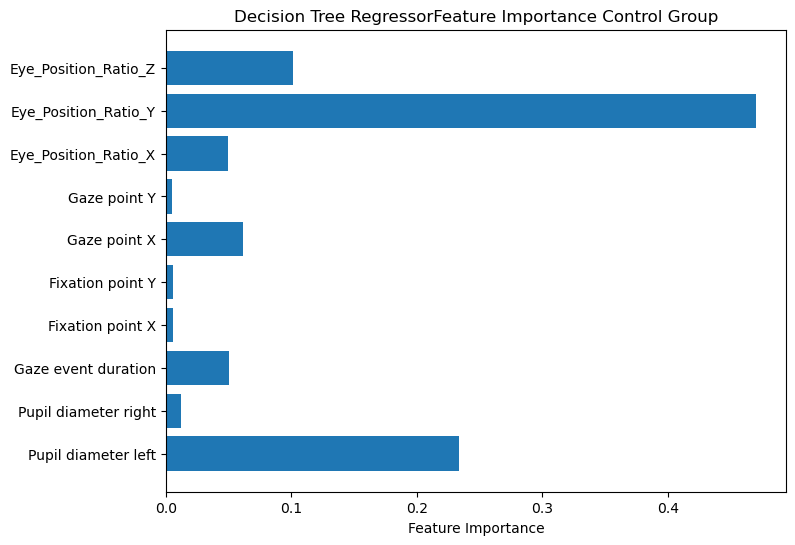

In [73]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.title('Decision Tree RegressorFeature Importance Control Group')
plt.savefig("dt_FI_control.jpg", bbox_inches='tight')

plt.show()

### Best model Test 

In [76]:
best_t_dt = DecisionTreeRegressor(max_depth = 9, max_features= None, min_samples_leaf=2 ,min_samples_split= 2, random_state=42).fit(X_t_train, y_t_train) 
#Best hyperparameters test group : {'max_depth': 9, 'max_features': 0, 'min_samples_leaf': 2, 'min_samples_split': 2}
y_pred = best_t_dt.predict(x_t_test)


# Evaluate the model
mse = mean_squared_error(y_t_test, y_pred)
r2 = r2_score(y_t_test, y_pred)  
mae = mean_absolute_error(y_t_test, y_pred)
print("test group")
print("Mean Squared Error: {:.3f}".format(mse))
print("R-squared: {:.3f}".format(r2))
print("Mean Absolute Error: {:.3f}".format(mae))

test group
Mean Squared Error: 75.508
R-squared: 0.710
Mean Absolute Error: 3.925


#### Feature importance

In [79]:
feature_importance = best_t_dt.feature_importances_
feature_names = X_t_train.columns.tolist()

for name, importance in zip(feature_names, feature_importance):

    print(f'{name}: {importance:.3f}')

Pupil diameter left: 0.066
Pupil diameter right: 0.018
Gaze event duration: 0.045
Fixation point X: 0.006
Fixation point Y: 0.046
Gaze point X: 0.016
Gaze point Y: 0.038
Gaze event duration: 0.022
Eye_Position_Ratio_X: 0.278
Eye_Position_Ratio_Y: 0.267
Eye_Position_Ratio_Z: 0.199


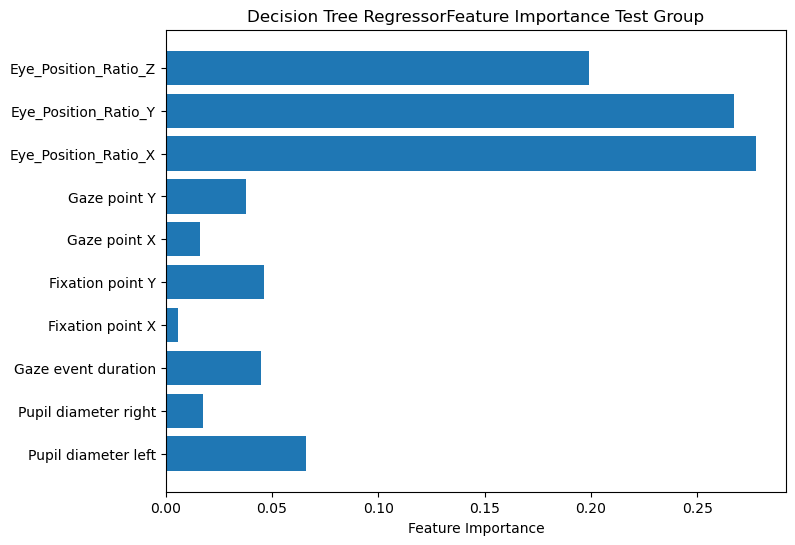

In [81]:
plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.title('Decision Tree RegressorFeature Importance Test Group')
plt.savefig("dt_FI_test.jpg", bbox_inches='tight')

plt.show()

#### visual 

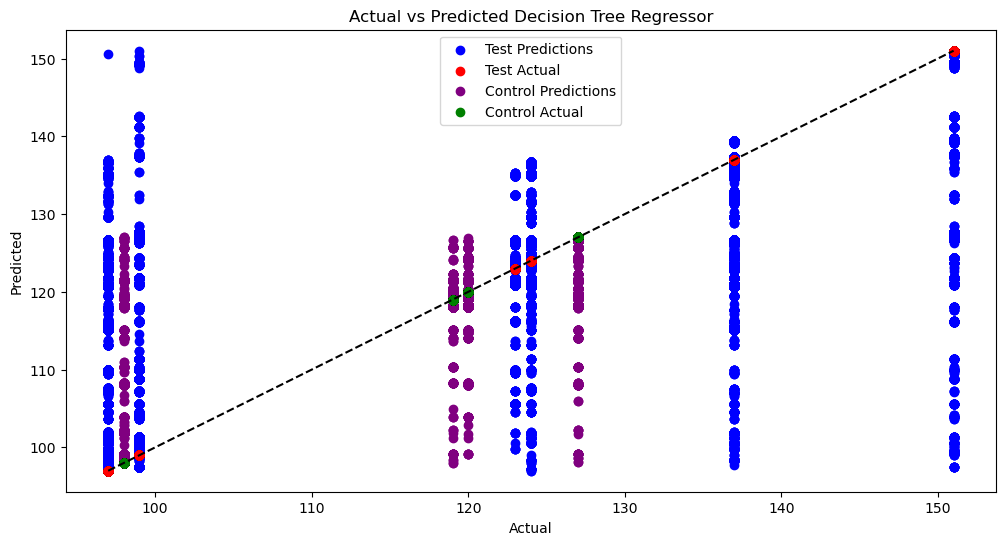

In [83]:
# This function was adapted from PRIYANK RAVAL's Kaggle notebook: https://www.kaggle.com/code/priyankraval/eyet-empathyscore-ipynb#Step-3-:-#Load-eyetzip_data_with_score.csv-with-empathy-score-for-data-analysis
plt.figure(figsize=(12, 6))

# Plot actual vs predicted for the treatment group
plt.scatter(y_t_test, y_pred, color='blue', label='Test Predictions')
plt.scatter(y_t_test, y_t_test, color="red", label='Test Actual')

# Plot actual vs predicted for the control group
plt.scatter(y_control_test, y_control_pred, color='purple', label='Control Predictions')
plt.scatter(y_control_test, y_control_test, color="green", label='Control Actual')

plt.plot([min(y_t_test.min(), y_control_test.min()), max(y_t_test.max(), y_control_test.max())], 
         [min(y_t_test.min(), y_control_test.min()), max(y_t_test.max(), y_control_test.max())], 
         color='black', linestyle='--')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Decision Tree Regressor')
plt.legend()
plt.savefig("score_best_dt.jpg", bbox_inches='tight')
plt.show()

# Gradient Boosting Regressor

#### base model 

In [85]:
gb_model_control = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Training and evaluation for Gradient Boosting Regressor
print("Gradient Boosting Regressor - Control Group:")
gb_model_control.fit(X_control_train, y_control_train)

# Make predictions on the testing set
y_control_pred = gb_model_control.predict(x_control_test)

# Evaluate the model
mse = mean_squared_error(y_control_test, y_control_pred)
r2 = r2_score(y_control_test, y_control_pred)  
mae = mean_absolute_error(y_control_test, y_control_pred)
print("control group")
print("Mean Squared Error: {:.3f}".format(mse))
print("R-squared: {:.3f}".format(r2))
print("Mean Absolute Error: {:.3f}".format(mae))


gb_model_test = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Training and evaluation for Gradient Boosting Regressor
print("Gradient Boosting Regressor - test Group:")
gb_model_test= gb_model_test.fit(X_t_train, y_t_train)

# Make predictions on the testing set
y_pred = gb_model_test.predict(x_t_test)

# Evaluate the model
mse = mean_squared_error(y_t_test, y_pred)
r2 = r2_score(y_t_test, y_pred)  
mae = mean_absolute_error(y_t_test, y_pred)
print("test group")
print("Mean Squared Error: {:.3f}".format(mse))
print("R-squared: {:.3f}".format(r2))
print("Mean Absolute Error: {:.3f}".format(mae))

Gradient Boosting Regressor - Control Group:
control group
Mean Squared Error: 22.261
R-squared: 0.657
Mean Absolute Error: 2.372
Gradient Boosting Regressor - test Group:
test group
Mean Squared Error: 94.558
R-squared: 0.637
Mean Absolute Error: 6.061


### Tuning

In [26]:
# Define Objective Function
def objective(params):
    gb = GradientBoostingRegressor(**params, random_state=42)
    gb.fit(X_control_train, y_control_train)  # Train the model on the validation set
    y_pred = gb.predict(x_control_val)
    mse = mean_squared_error(y_control_val, y_pred)
    return {'loss': mse, 'status': STATUS_OK}

# Define Search Space
space = {
    'n_estimators': hp.choice('n_estimators', range(50, 201, 20)),  # Vary number of trees from 50 to 200
    'learning_rate': hp.loguniform('learning_rate', -3, 0),  # Vary learning rate exponentially
    'max_depth': hp.choice('max_depth', range(1, 11)),  # Vary max_depth from 1 to 10
    'min_samples_split': hp.choice('min_samples_split', range(2, 11)),  # Vary min_samples_split from 2 to 10
    'min_samples_leaf': hp.choice('min_samples_leaf', range(1, 11)),  # Vary min_samples_leaf from 1 to 10
    'max_features': hp.choice('max_features', ['sqrt', 'log2', None])  # Vary max_features
}
# Run Hyperparameter Optimization
trials = Trials()
best = fmin(objective, space, algo=tpe.suggest, max_evals=20, trials=trials)

# Print the best hyperparameters
print("Best hyperparameters control group :", best)
#Best hyperparameters control group : {'learning_rate': 0.2971311944988746, 'max_depth': 9, 'max_features': 1, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 1}

100%|██████████| 20/20 [23:30<00:00, 70.54s/trial, best loss: 7.113405241434643] 
Best hyperparameters control group : {'learning_rate': 0.2971311944988746, 'max_depth': 9, 'max_features': 1, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 1}


In [27]:
def objective(params):
    gbt = GradientBoostingRegressor(**params, random_state=42)
    gbt.fit(X_t_train, y_t_train)  # Train the model on the validation set
    y_pred = gbt.predict(x_t_val)
    mse = mean_squared_error(y_t_val, y_pred)
    return {'loss': mse, 'status': STATUS_OK}

# Define Search Space
space = {
    'n_estimators': hp.choice('n_estimators', range(50, 201, 20)),  # Vary number of trees from 50 to 200
    'learning_rate': hp.loguniform('learning_rate', -3, 0),  # Vary learning rate exponentially
    'max_depth': hp.choice('max_depth', range(1, 11)),  # Vary max_depth from 1 to 10
    'min_samples_split': hp.choice('min_samples_split', range(2, 11)),  # Vary min_samples_split from 2 to 10
    'min_samples_leaf': hp.choice('min_samples_leaf', range(1, 11)),  # Vary min_samples_leaf from 1 to 10
    'max_features': hp.choice('max_features', ['sqrt', 'log2', None])  # Vary max_features
}
# Run Hyperparameter Optimization
trials = Trials()
best = fmin(objective, space, algo=tpe.suggest, max_evals=20, trials=trials)

# Print the best hyperparameters
print("Best hyperparameters test group :", best)
#Best hyperparameters test group : {'learning_rate': 0.38566707194790334, 'max_depth': 9, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 0, 'n_estimators': 4}

100%|██████████| 20/20 [2:30:28<00:00, 451.41s/trial, best loss: 29.35782995895532]  
Best hyperparameters test group : {'learning_rate': 0.41844965835689674, 'max_depth': 9, 'max_features': 2, 'min_samples_leaf': 5, 'min_samples_split': 6, 'n_estimators': 4}


### Best model

#### Control

In [86]:
gb_model_control = GradientBoostingRegressor(learning_rate= 0.2971311944988746, max_depth= 9, max_features = 'sqrt', min_samples_leaf = 5, min_samples_split = 3, n_estimators= 50, random_state=42)
#Best hyperparameters control group : {'learning_rate': 0.2971311944988746, 'max_depth': 9, 'max_features': 1, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 1}
# Training and evaluation for Gradient Boosting Regressor
print("Gradient Boosting Regressor - Control Group:")
gb_model_control.fit(X_control_train, y_control_train)

# Make predictions on the testing set
y_control_pred = gb_model_control.predict(x_control_test)

# Evaluate the model
mse = mean_squared_error(y_control_test, y_control_pred)
r2 = r2_score(y_control_test, y_control_pred)  
mae = mean_absolute_error(y_control_test, y_control_pred)
print("control group")
print("Mean Squared Error: {:.3f}".format(mse))
print("R-squared: {:.3f}".format(r2))
print("Mean Absolute Error: {:.3f}".format(mae))

Gradient Boosting Regressor - Control Group:
control group
Mean Squared Error: 8.808
R-squared: 0.864
Mean Absolute Error: 1.156


#### feature importance

In [87]:
feature_importance = gb_model_control.feature_importances_
feature_names = X_control_train.columns.tolist()

for name, importance in zip(feature_names, feature_importance):

    print(f'{name}: {importance:.3f}')

Pupil diameter left: 0.138
Pupil diameter right: 0.041
Gaze event duration: 0.057
Fixation point X: 0.031
Fixation point Y: 0.025
Gaze point X: 0.058
Gaze point Y: 0.032
Gaze event duration: 0.046
Eye_Position_Ratio_X: 0.127
Eye_Position_Ratio_Y: 0.313
Eye_Position_Ratio_Z: 0.132


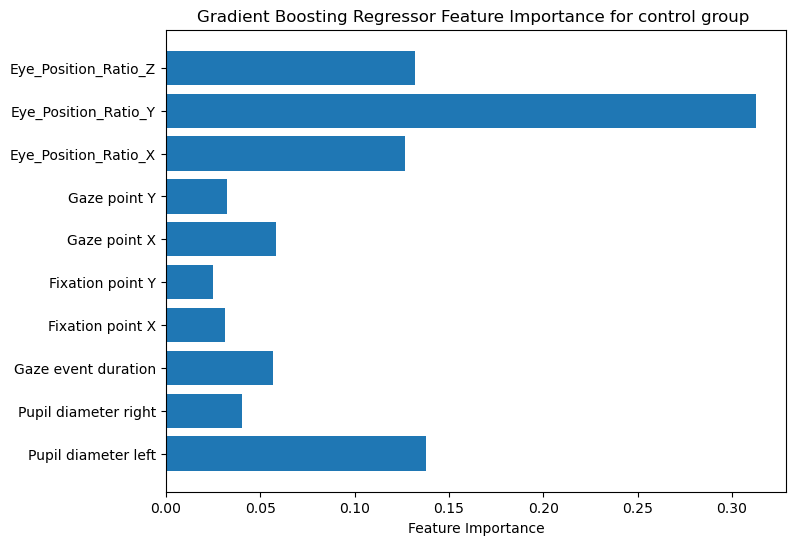

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.title('Gradient Boosting Regressor Feature Importance for control group ')
plt.savefig("gb_FI_control.jpg", bbox_inches='tight')

plt.show()

### Test

In [89]:
gb_model_test = GradientBoostingRegressor(learning_rate=0.41844965835689674, max_depth= 9, max_features = None , min_samples_leaf = 5, min_samples_split = 6 , n_estimators= 110, random_state=42)
#Best hyperparameters test group : {'learning_rate': 0.41844965835689674, 'max_depth': 9, 'max_features': 2, 'min_samples_leaf': 5, 'min_samples_split': 6, 'n_estimators': 4}
# Training and evaluation for Gradient Boosting Regressor
print("Gradient Boosting Regressor - test Group:")
gb_model_test= gb_model_test.fit(X_t_train, y_t_train)

# Make predictions on the testing set
y_pred = gb_model_test.predict(x_t_test)

# Evaluate the model
mse = mean_squared_error(y_t_test, y_pred)
r2 = r2_score(y_t_test, y_pred)  
mae = mean_absolute_error(y_t_test, y_pred)
print("test group")
print("Mean Squared Error: {:.3f}".format(mse))
print("R-squared: {:.3f}".format(r2))
print("Mean Absolute Error: {:.3f}".format(mae))

Gradient Boosting Regressor - test Group:
test group
Mean Squared Error: 33.410
R-squared: 0.872
Mean Absolute Error: 2.384


#### feature importance 

In [90]:
feature_importance = gb_model_test.feature_importances_
feature_names = X_t_train.columns.tolist()

for name, importance in zip(feature_names, feature_importance):

    print(f'{name}: {importance:.3f}')

Pupil diameter left: 0.061
Pupil diameter right: 0.021
Gaze event duration: 0.044
Fixation point X: 0.021
Fixation point Y: 0.048
Gaze point X: 0.031
Gaze point Y: 0.057
Gaze event duration: 0.027
Eye_Position_Ratio_X: 0.254
Eye_Position_Ratio_Y: 0.242
Eye_Position_Ratio_Z: 0.194


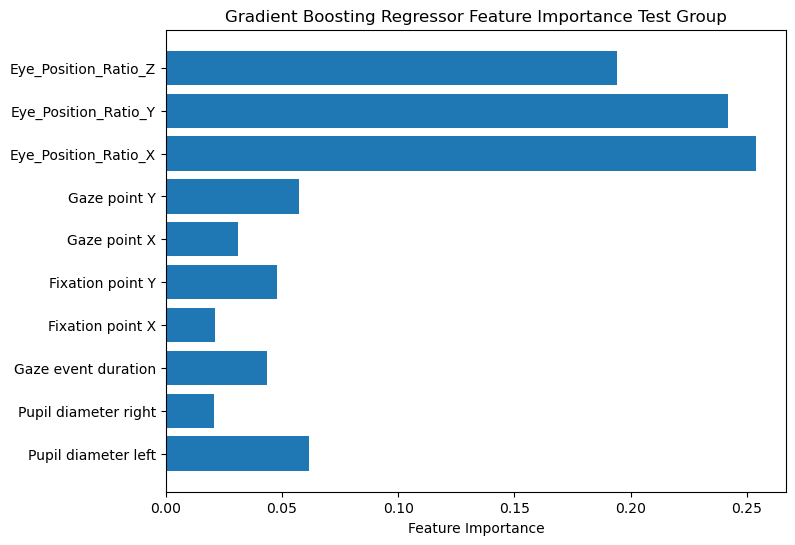

In [91]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.title('Gradient Boosting Regressor Feature Importance Test Group')
plt.savefig("gb_FI_test.jpg", bbox_inches='tight')

plt.show()

### Visual 

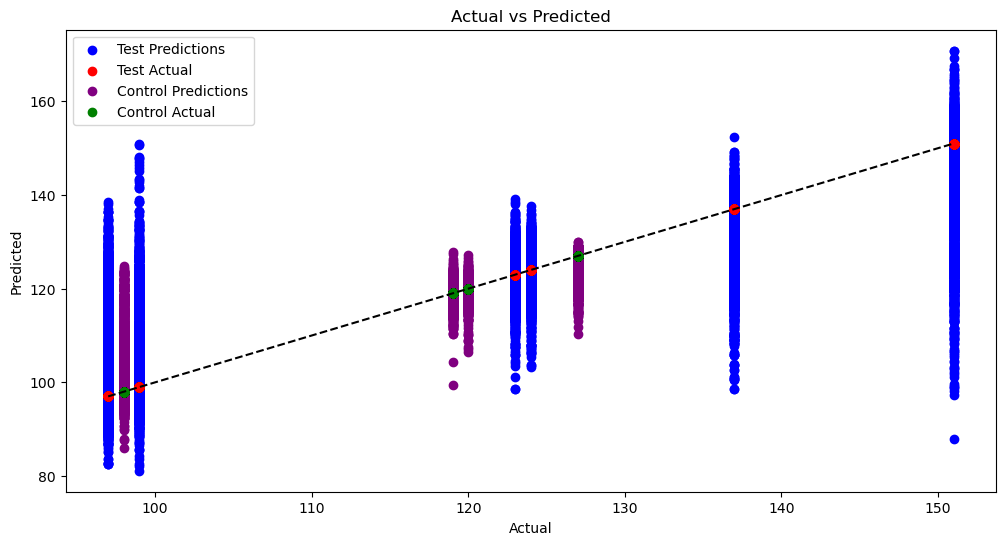

In [92]:
# This function was adapted from PRIYANK RAVAL's Kaggle notebook: https://www.kaggle.com/code/priyankraval/eyet-empathyscore-ipynb#Step-3-:-#Load-eyetzip_data_with_score.csv-with-empathy-score-for-data-analysis

plt.figure(figsize=(12, 6))

# Plot actual vs predicted for the treatment group
plt.scatter(y_t_test, y_pred, color='blue', label='Test Predictions')
plt.scatter(y_t_test, y_t_test, color="red", label='Test Actual')

# Plot actual vs predicted for the control group
plt.scatter(y_control_test, y_control_pred, color='purple', label='Control Predictions')
plt.scatter(y_control_test, y_control_test, color="green", label='Control Actual')

plt.plot([min(y_t_test.min(), y_control_test.min()), max(y_t_test.max(), y_control_test.max())], 
         [min(y_t_test.min(), y_control_test.min()), max(y_t_test.max(), y_control_test.max())], 
         color='black', linestyle='--')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.savefig("score_best_gb.jpg", bbox_inches='tight')
plt.show()

## ADA BOOSTING

### base model 

In [ ]:
ab_model_control = AdaBoostRegressor(n_estimators=50, random_state=42).fit(X_control_train, y_control_train) 

# Make predictions on the testing set
y_control_pred = ab_model_control.predict(x_control_test)

# Evaluate the model
mse = mean_squared_error(y_control_test, y_control_pred)
r2 = r2_score(y_control_test, y_control_pred)  
mae = mean_absolute_error(y_control_test, y_control_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)


ab_model_test = AdaBoostRegressor(n_estimators=50, random_state=42) 
ab_model_test.fit(X_t_train, y_t_train)

# Make predictions on the testing set
y_pred = dt_model_test.predict(x_t_test)

# Evaluate the model
mse = mean_squared_error(y_t_test, y_pred)
r2 = r2_score(y_t_test, y_pred)  
mae = mean_absolute_error(y_t_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

### Tuning

In [30]:
# Define Objective Function
def objective(params):
      # Initialize AdaBoost regressor with the remaining parameters
    ab_control = AdaBoostRegressor( **params, random_state=42)
    
    # Train the model on the validation set
    ab_control.fit(X_control_train, y_control_train)
    
    # Make predictions on the validation set
    y_pred = ab_control.predict(x_control_val)
    
    # Calculate mean squared error
    mse = mean_squared_error(y_control_val, y_pred)
    
    return {'loss': mse, 'status': STATUS_OK}

# Define Search Space
space = {
    'n_estimators': hp.choice('n_estimators', range(50, 500, 1)),
    'learning_rate': hp.loguniform('learning_rate', -4, 0),
    'loss': hp.choice('loss', ['linear', 'square', 'exponential']),
    'estimator': hp.choice('estimator', [None, DecisionTreeRegressor(max_depth=5),best_control_dt])
}


# Run Hyperparameter Optimization
trials = Trials()
best = fmin(objective, space, algo=tpe.suggest, max_evals=20, trials=trials)

# Print the best hyperparameters
print("Best hyperparameters control group :", best)
#Best hyperparameters control group : {'estimator': 2, 'learning_rate': 0.01863857377199747, 'loss': 2, 'n_estimators': 377}


100%|██████████| 20/20 [46:23<00:00, 139.18s/trial, best loss: 18.60995264820848] 
Best hyperparameters control group : {'estimator': 2, 'learning_rate': 0.01863857377199747, 'loss': 2, 'n_estimators': 377}


In [31]:
# Define Objective Function
def objective(params):
      # Initialize AdaBoost regressor with the remaining parameters
    ab_t = AdaBoostRegressor( **params, random_state=42)
    
    # Train the model on the validation set
    ab_t.fit(X_t_train, y_t_train)
    
    # Make predictions on the validation set
    y_pred = ab_t.predict(x_t_val)
    
    # Calculate mean squared error
    mse = mean_squared_error(y_t_val, y_pred)
    
    return {'loss': mse, 'status': STATUS_OK}

# Define Search Space
space = {
    'n_estimators': hp.choice('n_estimators', range(50, 500, 1)),
    'learning_rate': hp.loguniform('learning_rate', -4, 0),
    'loss': hp.choice('loss', ['linear', 'square', 'exponential']),
    'estimator': hp.choice('estimator', [None, DecisionTreeRegressor(max_depth=5),best_t_dt])
}


# Run Hyperparameter Optimization
trials = Trials()
best = fmin(objective, space, algo=tpe.suggest, max_evals=20, trials=trials)

# Print the best hyperparameters
print("Best hyperparameters test group :", best)
#Best hyperparameters test group : {'estimator': 2, 'learning_rate': 0.04643881178375007, 'loss': 2, 'n_estimators': 33}

100%|██████████| 20/20 [8:37:08<00:00, 1551.43s/trial, best loss: 71.8311091679874]  
Best hyperparameters test group : {'estimator': 2, 'learning_rate': 0.04643881178375007, 'loss': 2, 'n_estimators': 33}


### Best models

#### control

In [93]:
ab_model_control = AdaBoostRegressor(estimator = best_control_dt, learning_rate =  0.01863857377199747, n_estimators=377, loss='exponential',  random_state=42).fit(X_control_train, y_control_train) 

#Best hyperparameters control group : {'estimator': 2, 'learning_rate': 0.01863857377199747, 'loss': 2, 'n_estimators': 377}
# Make predictions on the testing set
y_control_pred = ab_model_control.predict(x_control_test)

# Evaluate the model
mse = mean_squared_error(y_control_test, y_control_pred)
r2 = r2_score(y_control_test, y_control_pred)  
mae = mean_absolute_error(y_control_test, y_control_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error: 19.928189505702797
R-squared: 0.6928293965553569
Mean Absolute Error: 2.243234663750148


#### feature importance

In [94]:
feature_importance = ab_model_control.feature_importances_
feature_names = X_control_train.columns.tolist()

for name, importance in zip(feature_names, feature_importance):

    print(f'{name}: {importance:.3f}')

Pupil diameter left: 0.078
Pupil diameter right: 0.039
Gaze event duration: 0.034
Fixation point X: 0.015
Fixation point Y: 0.009
Gaze point X: 0.061
Gaze point Y: 0.026
Gaze event duration: 0.033
Eye_Position_Ratio_X: 0.099
Eye_Position_Ratio_Y: 0.520
Eye_Position_Ratio_Z: 0.086


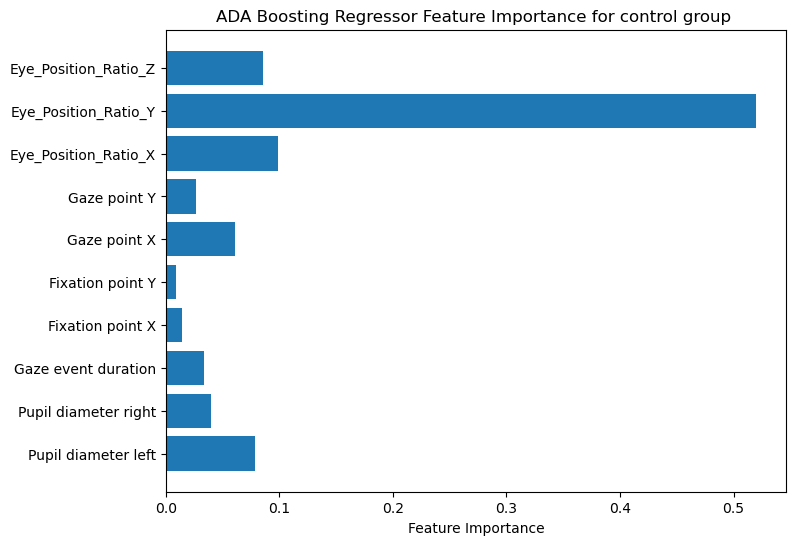

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.title('ADA Boosting Regressor Feature Importance for control group ')
plt.savefig("ab_FI_control.jpg", bbox_inches='tight')

plt.show()

### Test

In [120]:
ab_model_test = AdaBoostRegressor(estimator= best_t_dt, learning_rate =0.04643881178375007, loss = 'exponential', n_estimators=33,  random_state=42) 
ab_model_test.fit(X_t_train, y_t_train)
#Best hyperparameters test group : {'estimator': 2, 'learning_rate': 0.04643881178375007, 'loss': 2, 'n_estimators': 33}
# Make predictions on the testing set
y_pred = ab_model_test.predict(x_t_test)

# Evaluate the model
mse = mean_squared_error(y_t_test, y_pred)
r2 = r2_score(y_t_test, y_pred)  
mae = mean_absolute_error(y_t_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error: 70.66476340998875
R-squared: 0.728718358457686
Mean Absolute Error: 4.040042196842273


#### feature importance 

In [121]:
feature_importance = ab_model_test.feature_importances_
feature_names = X_t_train.columns.tolist()

for name, importance in zip(feature_names, feature_importance):

    print(f'{name}: {importance:.3f}')

Pupil diameter left: 0.075
Pupil diameter right: 0.014
Gaze event duration: 0.034
Fixation point X: 0.005
Fixation point Y: 0.041
Gaze point X: 0.023
Gaze point Y: 0.044
Gaze event duration: 0.036
Eye_Position_Ratio_X: 0.262
Eye_Position_Ratio_Y: 0.265
Eye_Position_Ratio_Z: 0.201


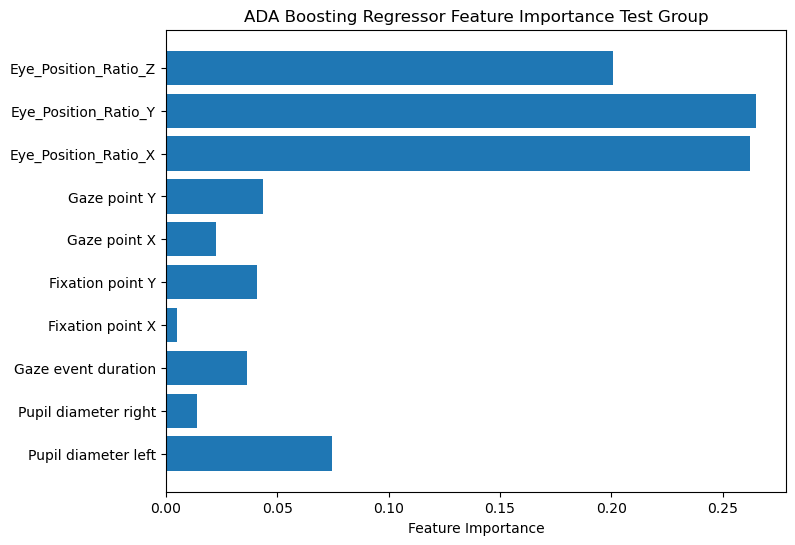

In [122]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.title('ADA Boosting Regressor Feature Importance Test Group')
plt.savefig("ab_FI_test.jpg", bbox_inches='tight')

plt.show()

### Visual 

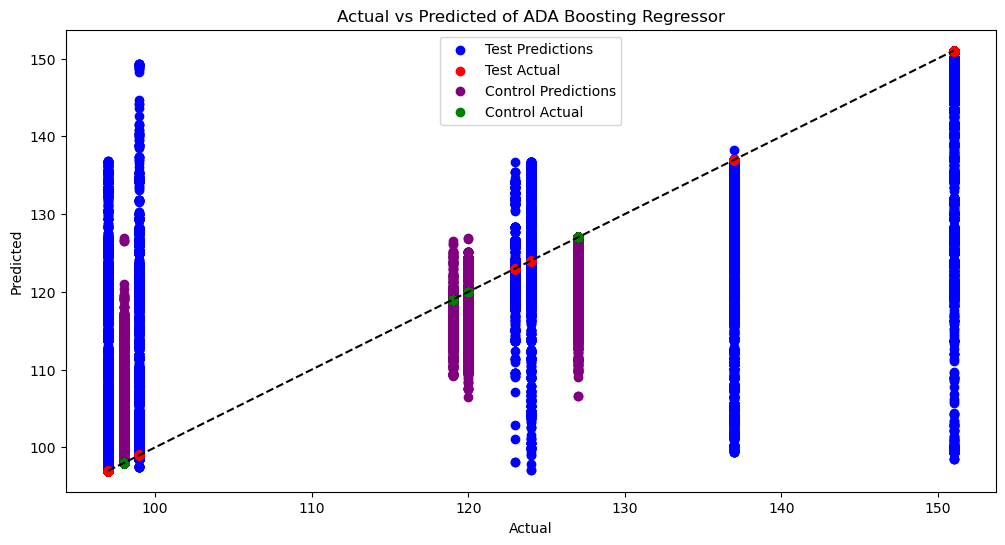

In [123]:
# This function was adapted from PRIYANK RAVAL's Kaggle notebook: https://www.kaggle.com/code/priyankraval/eyet-empathyscore-ipynb#Step-3-:-#Load-eyetzip_data_with_score.csv-with-empathy-score-for-data-analysis
plt.figure(figsize=(12, 6))

# Plot actual vs predicted for the treatment group
plt.scatter(y_t_test, y_pred, color='blue', label='Test Predictions')
plt.scatter(y_t_test, y_t_test, color="red", label='Test Actual')

# Plot actual vs predicted for the control group
plt.scatter(y_control_test, y_control_pred, color='purple', label='Control Predictions')
plt.scatter(y_control_test, y_control_test, color="green", label='Control Actual')

plt.plot([min(y_t_test.min(), y_control_test.min()), max(y_t_test.max(), y_control_test.max())], 
         [min(y_t_test.min(), y_control_test.min()), max(y_t_test.max(), y_control_test.max())], 
         color='black', linestyle='--')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted of ADA Boosting Regressor')
plt.legend()
plt.savefig("score_best_ab.jpg", bbox_inches='tight')
plt.show()

# references


Raval, P. (2024). Eyetempathyscore.ipynb. Retrieved 11/01/2024,
from http://web.archive.org/web/20080207010024/http://
www.808multimedia.com/winnt/kernel.htm